# Running basic experiments

In this notebook, we will show you how to setup an experiment using a predifined simultated arm environment and use its default configuration. We will then run it and see how to plot the results. 
We assume that you have already installed explauto on your computer (see the [installation section](http://flowersteam.github.io/explauto/installation.html)) and that everything works as expected. We also assume that you are familiar with the scientific grounding behind the library (see our [short introduction](http://flowersteam.github.io/explauto/about.html)).

## Setup an experiment

Thanks to explauto, setting up an experiment is really simple. You only have to instantiate the [Experiment](http://flowersteam.github.io/explauto/explauto.experiment.html) class.
The easiest way to do that is use the from_settings factory. This method automatically creates and setups an experiment using the default settings. You only have to choose:
* the experimental [Environment](http://flowersteam.github.io/explauto/explauto.environment.html),
* the type of babbling (motor vs goal),
* the [InterestModel](http://flowersteam.github.io/explauto/explauto.interestmodel.html),
* and the [SensorimotorModel](http://flowersteam.github.io/explauto/explauto.sensorimotormodel.html).

In [1]:
from explauto.experiment import Experiment

Experiment.from_settings

<bound method type.from_settings of <class 'explauto.experiment.experiment.Experiment'>>

You can check the documentation of the [from_settings()](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.experiment.Experiment.from_settings) class method for details.

### Finding the available environments

As shown on the documentation, you must specify the environment and models using their name. This API has been chosen so you can have really compact code and can easily switch from one environment (or model) to another.

Yet, you need to know which environments are available (this may depend on your installation of explauto). To do that, you can directly acess the available environments dictionary from the environment package. It is constructed as follows:
```python
{env_name: (env_cls, env_configs, env_testcases)}
```
where env_class is the class implementing the environment, env_configs are the available configurations for that environment and env_testcases is a function generating test cases for learning performance evaluation. 

In [2]:
from explauto.environment import environments

print 'Available environments: {}'.format(environments.keys())

Available environments: ['pypot', 'pendulum', 'simple_arm']



You can see here, that on this installation of explauto two environments are available:
* the pendulum
* the simple arm
* the npendulum (beta)

We will use the simple arm for this tutorial. It consists in the simulation of a $n$ degrees-of-freedom (DoF) arm with movements limited to a 2D plan, as detailled in [this tutorial](http://nbviewer.ipython.org/github/flowersteam/explauto/blob/master/notebook/setting_basic_experiment.ipynb).

Each available environment comes with a set of predefined configurations. A default configuration will always be defined.

In [3]:
env_cls, env_configs, testcases_generator = environments['simple_arm']
print 'Available configurations for the simple arm environment: {}'.format(env_configs.keys())

Available configurations for the simple arm environment: ['mid_dimensional', 'default', 'high_dim_high_s_range', 'low_dimensional', 'high_dimensional']


In [4]:
default_config = env_configs['default']

print 'Default configuration for the simple arm:'
for config_key, value in default_config.items():
    print '\t{}: {}'.format(config_key, value)

Default configuration for the simple arm:
	s_mins: [-0.5 -1. ]
	m_mins: [-1.04719755 -1.04719755 -1.04719755]
	noise: 0.02
	m_maxs: [ 1.04719755  1.04719755  1.04719755]
	s_maxs: [ 1.  1.]
	length_ratio: 3.0


### Finding the available models

You can use the same trick for the interest and sensorimotor models.

In [5]:
from explauto.interest_model import interest_models
from explauto.sensorimotor_model import sensorimotor_models

print 'Available interest models: {}'.format(interest_models.keys())
print 'Available sensorimotor models: {}'.format(sensorimotor_models.keys())

Available interest models: ['discretized_progress', 'tree', 'random', 'gmm_progress_beta', 'misc_random']
Available sensorimotor models: ['LWLR-BFGS', 'nearest_neighbor', 'WNN', 'LWLR-CMAES']


### Instantiating the experiment

Once you chose your environments and models you can directly instantiate the [Experiment](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.experiment.Experiment) class using the convenience method [from_settings](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.experiment.Experiment.from_settings). In this example, we chose to do motor babbling.

In [6]:
from explauto.experiment import Experiment, make_settings

s = make_settings(environment='simple_arm',
                  babbling_mode='motor', 
                  interest_model='random',
                  sensorimotor_model='nearest_neighbor')

expe = Experiment.from_settings(s)

The next step is to define at which iteration the learning should be evaluated. Note that by default your experiment will run until reaching the last evaluation.
Let's say we will evaluate at iteration steps: 1, 10, 20, 30, 100, and 200.

In [7]:
expe.evaluate_at([1, 10, 20, 30, 100, 200, 300, 400], s.default_testcases)

## Running the experiment

And now that the experiment is set up, you can run it! As we have defined evaluation steps, the experiment will run for 200 iterations (the last evaluation step).

Be aware that this step may actually run for a while.

In [8]:
expe.run()

## Plotting results

Now that your experiment is done, you want to plot the results.

For instance, you can plot the learning curve thanks to:

Populating the interactive namespace from numpy and matplotlib


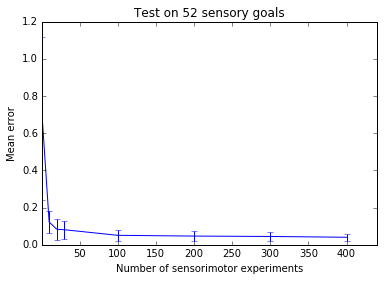

In [9]:
%pylab inline

ax = axes()
expe.log.plot_learning_curve(ax)

You can also plot projection of the reached points of the sensorimotor space thanks to:

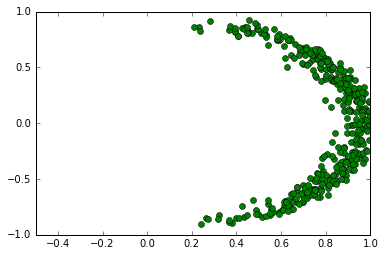

In [10]:
ax = axes()
expe.log.scatter_plot(ax, [('sensori', [0, 1]), ], color='green')

# Exercise

Run the same experiment using goal babbling instead for motor babbling.

In [11]:
# Solution
%load exercise_solutions/setting_basic_experiment__goal_babbling.py

Compare the results and try to understand why you can not really see any difference between motor and goal babbling in this case. This will be discussed in the next tutorial.